<a href="https://colab.research.google.com/github/mpbasto/fake-news-detector/blob/main/fake_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classification Project 📰 
<img src="https://www.beknownforsomething.com/wp-content/uploads/2016/09/News.jpg" alt="Newspaper boy cartoon" title="Extra! Extra!" width="200" height="200"/> 


> *“In the age of information, ignorance is a choice.”* - Donald Miller


In this notebook, you will find an end-to-end binary classification model that detects **fake news** using sklearn.

### What is Fake News?

[Fake news](https://en.wikipedia.org/wiki/Fake_news#:~:text=Fake%20news%20is%20false%20or,reports%20in%20newspapers%20were%20common.) is false or misleading information presented as news. Fake news often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue.

## Problem

Identifying whether a news deal is real or fake by its content.

> *I want to know if the news I'm reading are actually true.*

## Data

The dataset I’ll use for this project is called `news.csv` found in [DataFlair](https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/). 

## Evaluation

Using sklearn, I will build a [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on the dataset. Then, I will initialize a [`PassiveAggressiveClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html) and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

The `TfidfVectorizer` converts a collection of raw documents to a matrix of [TF-IDF](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089#:~:text=TF%2DIDF%20stands%20for%20%E2%80%9CTerm,Information%20Retrieval%20and%20Text%20Mining.) features, which is a word quantifier (determines a score for each word to mark its importance in a document).
* **TF (Term Frequency)** is the number of times a term occurs in a document.
* **IDF (Inverse Document Frequency)** is a measure of how much information the word provides, i.e., if it is common or rare across all documents.

The `PassiveAggressiveClassifier` is an [online learning](https://thecleverprogrammer.com/2021/02/10/passive-aggressive-classifier-in-machine-learning/) classification algorithm that remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, update and adjustment.


## Features

There are a total of 6335 news articles in this dataset. There are also 4 attributes:
* `[id]` - identifies the news.
* `[title]` - the title of article and text, and the fourth column has labels denoting whether the news is REAL or FAKE.
* `[text]` - the text of article
* `[label]` - REAL and FAKE classes

### Preparing workspace


In [1]:
# Importing necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Along with the chosen model and evaluations...

In [2]:
# Importing sklearn models and evaluations
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Loading data & getting it ready

And get shape of DF...

In [3]:
# Loading data
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Fake News/news.csv')
df.shape

(6335, 4)

In [4]:
# Checking top 5 samples
df.head()

,Id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# Checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
# Looking for null values
df.isna().sum()

Id       0
title    0
text     0
label    0
dtype: int64

In [7]:
# How many articles do we have in each class?
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

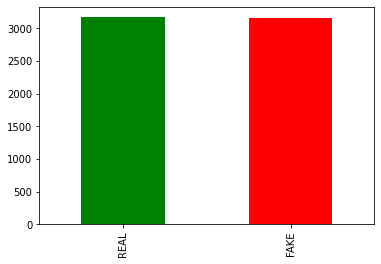

In [8]:
df['label'].value_counts().plot(kind='bar', color=['green', 'red']);

The values for both labels are pretty well distributed and there's no data missing from the dataset. Therefore, it's ok to proceed and get the labels from DF.

## Modelling

*   Reminder of the project's problem:
> Identifying whether a news deal is real or fake by its content.

### Training and test split
It is necessary to split the target variable (`label` column) from the data so that the machine learning model can predict it. Once the target variable is separated from the rest, I am going to split the data into a training set and a test set.

The training data will consist only of the `text` column, seen as this is the variable which contains enough useful data to train and predict.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on. So `test_size` parameter of the `train_test_split()` function will be set to `0.2`.

In [9]:
# Getting labels from DF - split into X & y
X = df['text']
y = df['label'] # Target variable

In [10]:
# Showing independent variable
X.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [11]:
# Showing target variable
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [12]:
# Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # independent variable
                                                    y, # dependent variable
                                                    test_size=0.2, # percentage of data to use for test set
                                                    random_state=7) # Random seed for reproducibility

Now that the data has been split into training and test datasets, let's have a look at the training data.

In [13]:
X_train.head()

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
Name: text, dtype: object

In [14]:
print('nr of training labels: ', len(y_train))

nr of training labels:  5068


In [15]:
y_train

6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
        ... 
5699    FAKE
2550    REAL
537     REAL
1220    REAL
4271    REAL
Name: label, Length: 5068, dtype: object

5068 samples will be used to train the model for prediction.

In [16]:
print('nr of test labels: ', len(y_test))

nr of test labels:  1267


In [17]:
y_test

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
        ... 
4986    REAL
5789    REAL
4338    REAL
5924    FAKE
6030    REAL
Name: label, Length: 1267, dtype: object

The model will be tested on 1267 samples.

### Preprocessing the data
With the data now split, it is necessary to transform it into a matrix of TF-IDF features, by initializing `TfidfVectorizer()`. The function will also extract stop words from the English language before processing the data (words like “and”, “the”, “him”) and set a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). 

[Stop words](https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words) are presumed to be uninformative in representing the content of a text, and may be removed to avoid them being construed as signal for prediction. If we were to feed the direct count data directly to a classifier, those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In [18]:
# Initializing TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fitting and transforming X_train set
vect_X_train = vectorizer.fit_transform(X_train)

 # Transforming X_test set
vect_X_test = vectorizer.transform(X_test)

In [19]:
vect_X_train

<5068x61727 sparse matrix of type '<class 'numpy.float64'>'
	with 1337219 stored elements in Compressed Sparse Row format>

### Why do we use `fit_transform()` on training data but `transform()` on the test data?

During my research, I came across this [article](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe) from Chetna Khanna, which answers this question with the utmost clarity and recommend bookmarking for future reference.

To sum up:
* `fit_transform()` first fits, then transforms the dataset in the same implementation. The **“best practice”** is to only use it on the training dataset.
> *“Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.”*

* `transform()` applies parameters learned from the `fit()` method. So the model will take the parameters learned from the fitting part of `fit_transform()`, which was applied to the training dataset, and use them on the test dataset so that the same parameters are used.
> *“If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.”*


## Modelling & Evaluation

The `PassiveAggressiveClassifier()` is an [online learning](https://thecleverprogrammer.com/2021/02/10/passive-aggressive-classifier-in-machine-learning/) classification model that is going to be used for this project.

It will be fitted into the vect_X_train and y_train before making predictions on the test set.

In [20]:
NUM_EPOCHS = 50

# Instanciating and fitting the PassiveAggressiveClassifier model
clf = PassiveAggressiveClassifier(max_iter=NUM_EPOCHS)
clf.fit(vect_X_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

With the model now fitted, I can now make predictions on the test dataset and evaluate its accuracy.

In [21]:
X_train

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
                              ...                        
5699                                                     
2550    It’s not that Americans won’t elect wealthy pr...
537     Anyone writing sentences like ‘nevertheless fu...
1220    More Catholics are in Congress than ever befor...
4271    It was hosted by CNN, and the presentation was...
Name: text, Length: 5068, dtype: object

In [22]:
train_preds = clf.predict(vect_X_train)
str(round(accuracy_score(y_train, train_preds) * 100, 2)) + '%'

'100.0%'

In [23]:
# Creating function for model evaluation

def model_score(model, X_train, X_test, y_train, y_test):
  """
  Takes model, training and test datasets (X_train, X_test, y_train, y_test), and evaluates accuracy score of model.
  Returns percentage of accuracy score.
  """
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  evaluation = {
      "Training accuracy score": accuracy_score(y_train, train_preds),
      "Test accuracy score": accuracy_score(y_test, test_preds),
  }
  # Returning the accuracy score in percentage format - rounded in 2 decimal places
  scores = {}
  for k, v in evaluation.items():
    scores[k] = str(round(v * 100, 2)) + '%'
  return scores


In [24]:
# Predicting on the training and test datasets and calculating accuracies
model_score(clf, X_train=vect_X_train, X_test=vect_X_test, y_train=y_train, y_test=y_test)

{'Test accuracy score': '92.74%', 'Training accuracy score': '100.0%'}

It is possible to verify that the model performed really well on the training dataset, as its accuracy score is 100%.

Moreover, the model also got an accuracy of 92.9%!

Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

### Confusion matrix 😵‍💫

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using `confusion_matrix()`
 and passing it the true labels and predicted labels.

In [25]:
# Reinstantiating test_preds (was only created inside model_score function)
test_preds = clf.predict(vect_X_test)

# Displaying confusion matrix
print(confusion_matrix(y_test, test_preds))

[[589  49]
 [ 43 586]]


For presentation purposes, I am going to create a function which uses Seaborn's `heatmap()` which makes the confusion matrix more visual.

In [26]:
# Importing seaborn
import seaborn as sns

LABELS = ['FAKE', 'REAL']
THEME = "YlGnBu"

def plot_confusion_mat(y_test, y_preds):
  """
  Plots a confusion matrix using heatmap() from Seaborn.
  """
  fig, ax = plt.subplots(figsize=(6, 6))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds, labels=LABELS),
                   annot=True, # Annotate the boxes
                   fmt='d', # Preventing Exponential Notation
                   cbar=False, 
                   cmap=THEME)
  # Set up x & y labels and ticks
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  ax.set_xticklabels(LABELS)
  ax.set_yticklabels(LABELS)
  # Set up title
  plt.title('Fake News Confusion Matrix', fontsize=14)

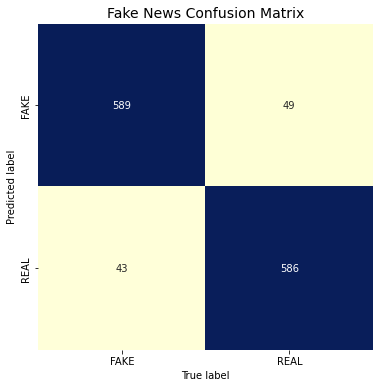

In [27]:
# Displaying confusion matrix
plot_confusion_mat(y_test=y_test, y_preds=test_preds)

So with this model, we have 590 true positives, 587 true negatives, 42 false positives, and 49 false negatives. In essence, there are 48 occasions where the model predicted FAKE when it should've been REAL (false negative) and 42 occasions where the model predicted REAL instead of FAKE (false positive).


### Classification Report

A classification report will also provide information of the precision and recall of our model for each class.

As a recap:
* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [28]:
from sklearn.metrics import classification_report

# Displaying classification report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [29]:
import pickle

FILEPATH = './drive/MyDrive/Colab Notebooks/Fake News/passive_aggressive_Classifier_news.bin'

# Save trained model to file
with open(FILEPATH, 'wb') as filepath:
    pickle.dump(clf, filepath)

## Conclusion

I believe that more data is needed before the model is ready for production, as the model was trained with less than 10,000 samples.

Moreover, its hyperparameters still need to be assessed, even though the predictions and the confusion matrix results look promising. The model wrongly predicted 7% of samples on the test dataset but still achieved 93% accuracy.

Once the model is ready for production, the project will be developing a Flask web service to be deployed into Heroku.